In [1]:
import numpy as np

# 파일 로드
data = np.load('Aaron_Eckhart_0.npz')

# 저장된 배열의 키 목록 출력
print(data.files)

# 각 배열의 내용 확인
for key in data.files:
    print(f"키: {key}")
    print(data[key])

['colorImages', 'boundingBox', 'landmarks2D', 'landmarks3D']
키: colorImages
[[[[ 1  0  0 ...  0  0  0]
   [10 11 10 ...  5  5  5]
   [77 77 76 ... 68 68 68]]

  [[ 0  0  0 ...  0  0  0]
   [ 4  5  5 ... 11 11 11]
   [64 64 64 ... 74 74 74]]

  [[ 1  0  0 ...  0  0  0]
   [ 3  3  3 ... 12 12 12]
   [62 64 64 ... 77 77 77]]

  ...

  [[44 44 44 ... 42 42 42]
   [ 8  8  8 ...  7  7  7]
   [ 0  0  0 ...  0  0  0]]

  [[46 46 46 ... 42 42 42]
   [ 9  9  9 ...  7  7  7]
   [ 0  0  0 ...  0  0  0]]

  [[47 47 47 ... 42 42 42]
   [10 10 10 ...  7  7  7]
   [ 0  0  0 ...  0  0  0]]]


 [[[ 0  0  0 ...  0  0  0]
   [ 9 10  9 ...  5  5  5]
   [76 76 75 ... 68 68 68]]

  [[ 0  0  0 ...  0  0  0]
   [ 4  5  5 ... 10 10 10]
   [64 64 64 ... 73 73 73]]

  [[ 1  0  0 ...  0  0  0]
   [ 3  3  3 ... 11 11 11]
   [62 64 64 ... 76 76 76]]

  ...

  [[44 44 44 ... 42 42 42]
   [ 8  8  8 ...  7  7  7]
   [ 0  0  0 ...  0  0  0]]

  [[46 46 46 ... 42 42 42]
   [ 9  9  9 ...  7  7  7]
   [ 0  0  0 ...  0  0  

In [2]:
images = data['colorImages']
print('이미지 데이터 형태:', images.shape)

이미지 데이터 형태: (231, 237, 3, 79)


In [3]:
# 첫 번째 이미지 추출
first_image = images[0]

# 이미지의 형태 확인
print('첫 번째 이미지 형태:', first_image.shape)

첫 번째 이미지 형태: (237, 3, 79)


In [5]:
first_frame = images[:, :, :, 0]  # 첫 번째 프레임 추출
print('첫 번째 프레임 형태:', first_frame.shape)

첫 번째 프레임 형태: (231, 237, 3)


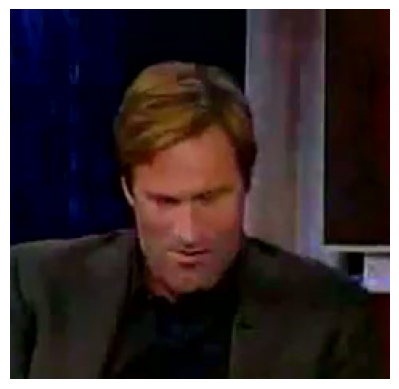

In [6]:
import matplotlib.pyplot as plt

plt.imshow(first_frame.astype(np.uint8))
plt.axis('off')
plt.show()


2024-11-05 08:11:04.070419: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-05 08:11:04.138014: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 08:11:04.138085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 08:11:04.138164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 08:11:04.157243: I tensorflow/core/platform/cpu_feature_g

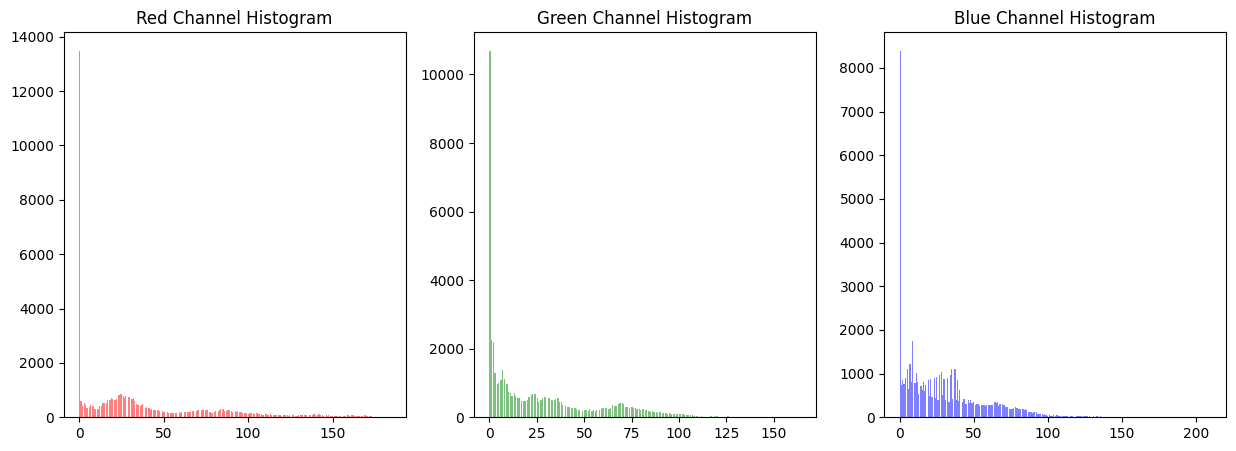

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_array = img_to_array(first_frame)

# 각 채널 분리
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# 각 채널의 픽셀 값 히스토그램 그리기
plt.figure(figsize=(15, 5))

# Red 채널 히스토그램
plt.subplot(1, 3, 1)
plt.hist(red_channel.flatten(), bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')

# Green 채널 히스토그램
plt.subplot(1, 3, 2)
plt.hist(green_channel.flatten(), bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')

# Blue 채널 히스토그램
plt.subplot(1, 3, 3)
plt.hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')

plt.show()

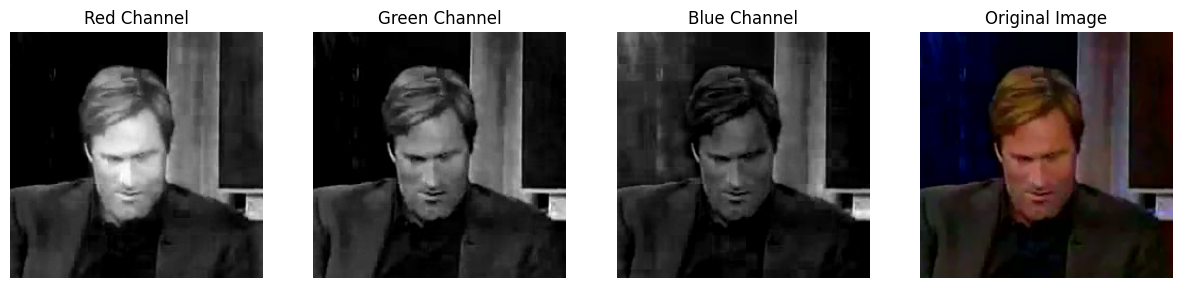

In [30]:
# 시각화 설정
plt.figure(figsize=(15, 5))

# Red 채널
plt.subplot(1, 4, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Green 채널
plt.subplot(1, 4, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Blue 채널
plt.subplot(1, 4, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# 원본 이미지
plt.subplot(1, 4, 4)
plt.imshow(image_array.astype('uint8'))
plt.title('Original Image')
plt.axis('off')

plt.show()

In [26]:
# 채널을 1D 배열로 변환
red_flat = red_channel.flatten()
green_flat = green_channel.flatten()
blue_flat = blue_channel.flatten()

# 상관계수 계산
corr_rg = np.corrcoef(red_flat, green_flat)[0, 1]
corr_rb = np.corrcoef(red_flat, blue_flat)[0, 1]
corr_gb = np.corrcoef(green_flat, blue_flat)[0, 1]

print("Red-Green 채널 상관계수:", corr_rg)
print("Red-Blue 채널 상관계수:", corr_rb)
print("Green-Blue 채널 상관계수:", corr_gb)


Red-Green 채널 상관계수: 0.9277232143502858
Red-Blue 채널 상관계수: 0.6427407996298444
Green-Blue 채널 상관계수: 0.786459499237667


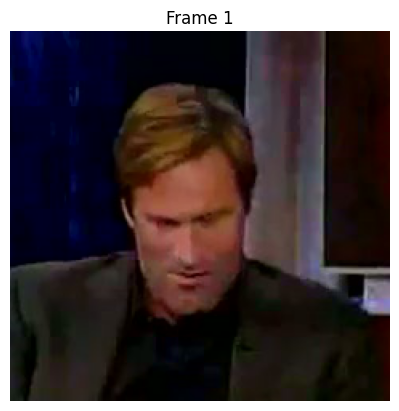

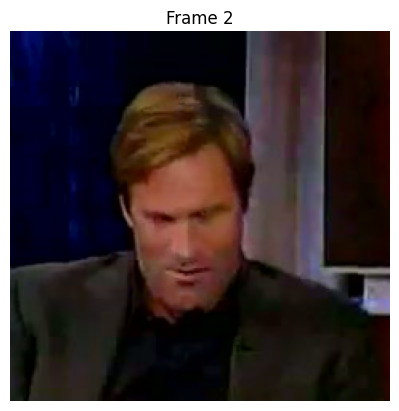

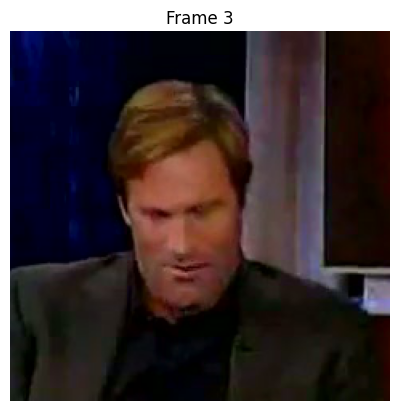

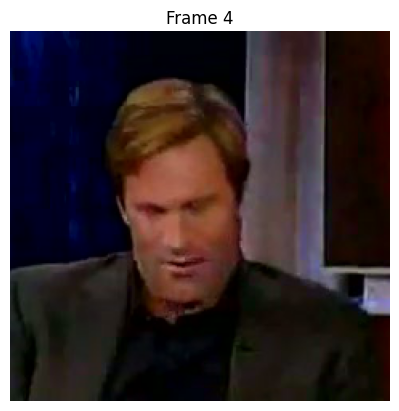

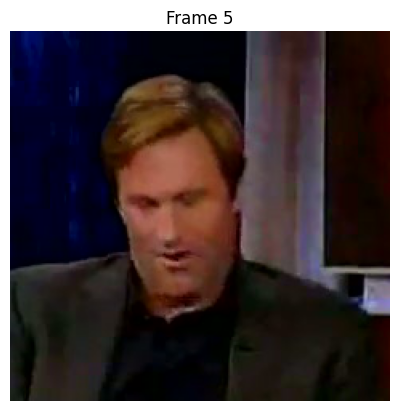

In [11]:
num_frames = images.shape[3]  # 프레임 수 (79)

for i in range(num_frames):
    frame = images[:, :, :, i]  # i번째 프레임 추출
    
    # 축 교환 제거
    # frame_corrected = np.transpose(frame, (1, 0, 2))  # 이 부분 제거
    
    plt.imshow(frame.astype(np.uint8))
    plt.axis('off')
    plt.title(f'Frame {i+1}')
    plt.show()
    
    # 표시할 프레임 수를 제한하려면 다음과 같이 합니다:
    if i == 4:
        break  # 처음 5프레임만 표시


In [13]:
landmarks2D = data['landmarks2D']
print('특징점 데이터 형태:', landmarks2D.shape)

특징점 데이터 형태: (68, 2, 79)


이미지 데이터 형태: (231, 237, 3, 79)
특징점 데이터 형태: (68, 2, 79)


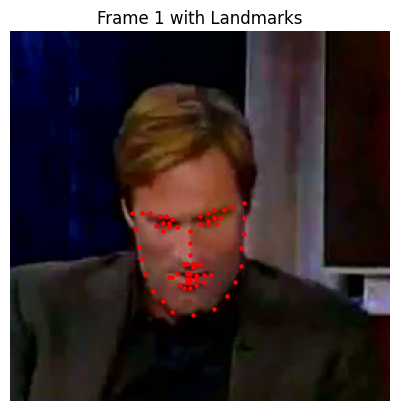

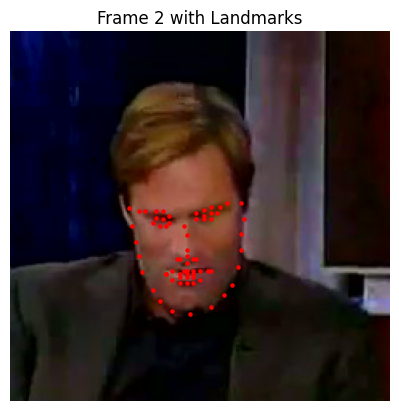

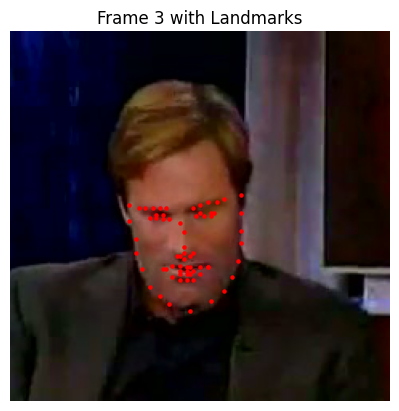

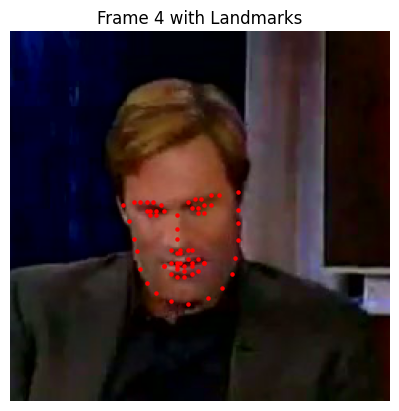

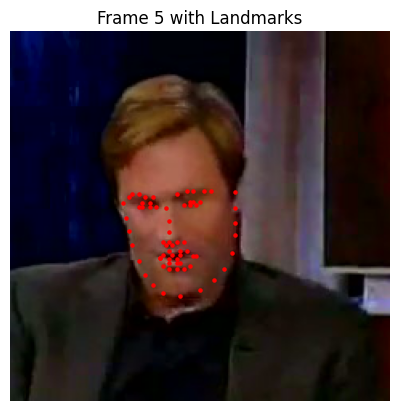

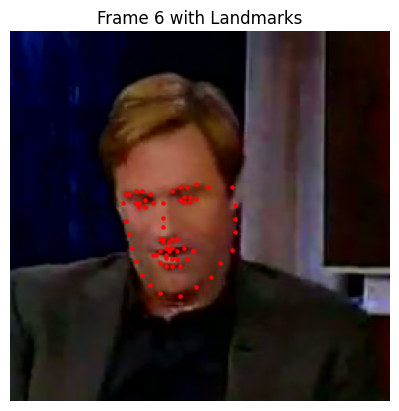

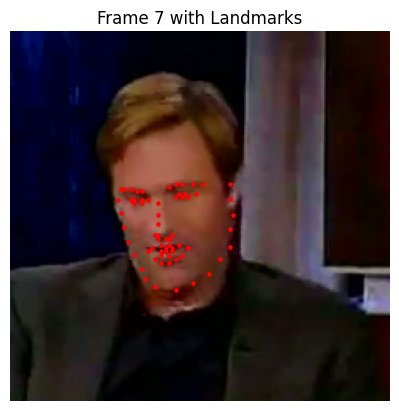

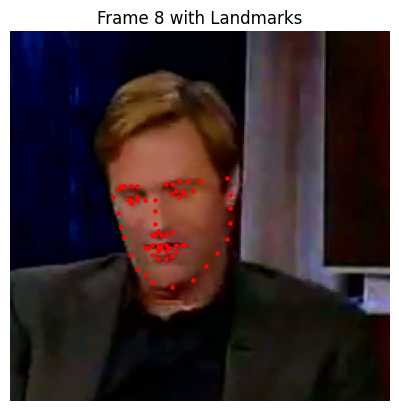

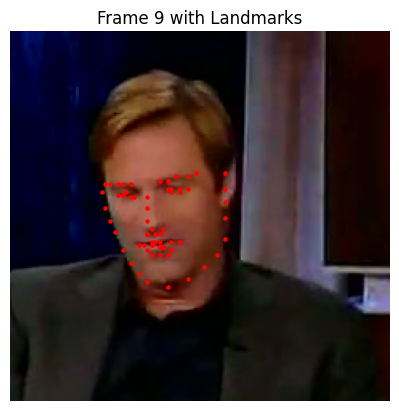

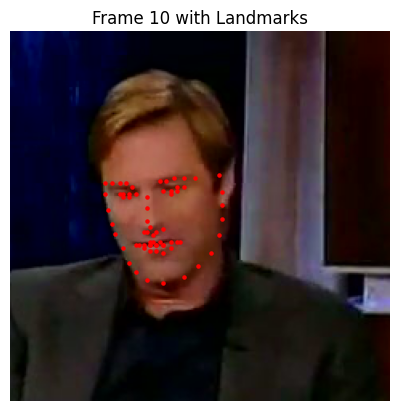

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
data = np.load('Aaron_Eckhart_0.npz')

# 이미지 및 특징점 데이터 추출
images = data['colorImages']
landmarks2D = data['landmarks2D']

# 데이터 형태 확인
print('이미지 데이터 형태:', images.shape)          # (231, 237, 3, 79)
print('특징점 데이터 형태:', landmarks2D.shape)     # (68, 2, 79)

# 프레임 수 확인
num_frames = images.shape[3]

for i in range(num_frames):
    frame = images[:, :, :, i]  # i번째 프레임 추출 (형태: (231, 237, 3))
    lm = landmarks2D[:, :, i]   # i번째 프레임의 특징점 추출 (형태: (68, 2))
    
    # x좌표와 y좌표 추출
    x_coords = lm[:, 0]
    y_coords = lm[:, 1]
    
    # 이미지 표시
    plt.imshow(frame.astype(np.uint8))
    plt.axis('off')
    plt.title(f'Frame {i+1} with Landmarks')
    
    # 특징점 표시
    plt.scatter(x_coords, y_coords, c='r', s=5)
    plt.show()
    
    # 표시할 프레임 수를 제한하려면 다음과 같이 합니다:
    if i == 9:
        break  # 처음 10프레임만 표시


17


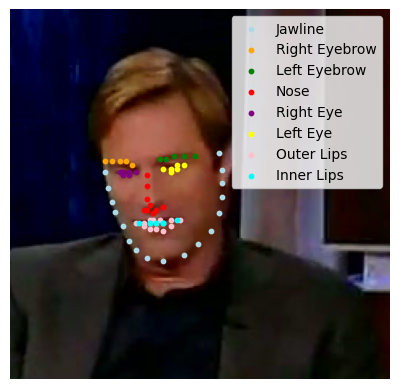

In [23]:
# 얼굴 부위별로 색상 지정
jaw_indices = np.arange(0, 17)
right_eyebrow_indices = np.arange(17, 22)
left_eyebrow_indices = np.arange(22, 27)
nose_indices = np.arange(27, 36)
right_eye_indices = np.arange(36, 42)
left_eye_indices = np.arange(42, 48)
outer_lips_indices = np.arange(48, 60)
inner_lips_indices = np.arange(60, 68)

print(len(jaw_indices))
# 이미지 표시
plt.imshow(frame.astype(np.uint8))
plt.axis('off')

# 각 부위별로 특징점 표시
plt.scatter(x_coords[jaw_indices], y_coords[jaw_indices], c='lightblue', s=10, label='Jawline')
plt.scatter(x_coords[right_eyebrow_indices], y_coords[right_eyebrow_indices], c='orange', s=10, label='Right Eyebrow')
plt.scatter(x_coords[left_eyebrow_indices], y_coords[left_eyebrow_indices], c='green', s=10, label='Left Eyebrow')
plt.scatter(x_coords[nose_indices], y_coords[nose_indices], c='red', s=10, label='Nose')
plt.scatter(x_coords[right_eye_indices], y_coords[right_eye_indices], c='purple', s=10, label='Right Eye')
plt.scatter(x_coords[left_eye_indices], y_coords[left_eye_indices], c='yellow', s=10, label='Left Eye')
plt.scatter(x_coords[outer_lips_indices], y_coords[outer_lips_indices], c='pink', s=10, label='Outer Lips')
plt.scatter(x_coords[inner_lips_indices], y_coords[inner_lips_indices], c='cyan', s=10, label='Inner Lips')

plt.legend(loc='upper right')
plt.show()


In [3]:
import glob
import numpy as np

npz_files = glob.glob('youtube_dataset/**/*.npz', recursive=True)

total_images = 0
file_image_counts = []

for file in npz_files:
    data = np.load(file)
    images = data['colorImages']
    num_frames = images.shape[3]
    total_images += num_frames
    file_image_counts.append((file, num_frames))

print(f'총 이미지 수: {total_images}')
print(f'총 .npz 파일 수: {len(npz_files)}')

총 .npz 파일 수: 2194
